## 1. Obtain and review raw data
<p>One day, my old running friend and I were chatting about our running styles, training habits, and achievements, when I suddenly realized that I could take an in-depth analytical look at my training. I have been using a popular GPS fitness tracker called <a href="https://runkeeper.com/">Runkeeper</a> for years and decided it was time to analyze my running data to see how I was doing.</p>
<p>Since 2012, I've been using the Runkeeper app, and it's great. One key feature: its excellent data export. Anyone who has a smartphone can download the app and analyze their data like we will in this notebook.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/runner_in_blue.jpg" alt="Runner in blue" title="Explore world, explore your data!"></p>
<p>After logging your run, the first step is to export the data from Runkeeper (which I've done already). Then import the data and start exploring to find potential problems. After that, create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data.</p>
<p>I exported seven years worth of my training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. Let's load and inspect it.</p>

In [63]:
import piplite
await piplite.install(['pandas', 'matplotlib', 'scipy', 'numpy','scikit-learn', 'openpyxl'])
import io
from js import fetch
import pandas as pd
import numpy as np
import matplotlib as mpl
print ('Done!!')

Done!!


In [141]:
# Import pandas
# ... YOUR CODE FOR TASK 1 ...

# Define file containing dataset
URL= 'cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(URL, parse_dates=["Date"], index_col=["Date"])

# First look at exported data: select sample of 3 random rows 
df_activities.sample(3)

# Print DataFrame summary
df_activities.info()
df_activities.head(10)
# ... YOUR CODE FOR TASK 1 ...

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx
2018-10-19 17:52:32,fe2cb3fc-6330-40fa-8a92-0f86f4e72282,Running,NaN,10.29,59:18,5:46,10.41,764.0,133,155.0,NaN,NaN,2018-10-19-175232.gpx
2018-10-14 17:28:56,96acedc9-d3d5-4aac-8df4-f549a6418c1d,Running,NaN,12.93,1:10:16,5:26,11.04,953.0,159,158.0,NaN,NaN,2018-10-14-172856.gpx
2018-10-12 17:41:58,3c91092b-e6f3-4565-b540-6b6537358006,Running,NaN,12.31,1:09:26,5:38,10.64,903.0,134,157.0,NaN,NaN,2018-10-12-174158.gpx
2018-10-06 16:45:02,4c163abe-3a57-42fd-b50b-7f365960cbd4,Cycling,NaN,19.63,1:26:26,4:24,13.63,577.0,210,79.0,NaN,NaN,2018-10-06-164502.gpx


## 2. Data preprocessing
<p>Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.</p>
<p>But, we do notice missing values using the <code>info()</code> method. What are the reasons for these missing values? It depends. Some heart rate information is missing because I didn't always use a cardio sensor. In the case of the <code>Notes</code> column, it is an optional field that I sometimes left blank. Also, I only used the <code>Route Name</code> column once, and never used the <code>Friend's Tagged</code> column.</p>
<p>We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:</p>
<ul>
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [147]:
# Define list of columns to be deleted
cols_to_drop = ["Friend's Tagged","Route Name","GPX File","Activity Id","Notes"]
#df_activities= df_activities.drop(columns=["Activity Id","Route Name", "Friend's Tagged","GPX File","Notes"], axis=1)
# Delete unnecessary columns
# ... YOUR CODE FOR TASK 2 ...

# Count types of training activities
df_activities['Type'].replace("Other","Unicycling")

df_activities.value_counts("Type")

Type
Running    459
Cycling     29
Walking     18
Other        2
dtype: int64

In [66]:
df_activities.isnull().sum()

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

## 3. Dealing with missing values
<p>As we can see from the last output, there are 214 missing entries for my average heart rate.</p>
<p>We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called <em>mean imputation</em>. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [67]:
# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type']== 'Cycling'].copy()
df_unicyc= df_activities[df_activities['Type']== 'Unicycling'].copy()

#to replace nan in walk and unicyc
df_walk['Average Heart Rate (bpm)'].replace(np.nan, '0')
df_unicyc['Average Heart Rate (bpm)'].replace(np.nan, '0')

In [71]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type']== 'Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_walk= df_activities[df_activities['Type']== 'Walking']['Average Heart Rate (bpm)'].mean()
avg_hr_unicyc= df_activities[df_activities['Type']== 'Unicycling']['Average Heart Rate (bpm)'].mean()

# Filling missing values with counted means  
#df_walk['Average Heart Rate (bpm)'].fillna(int(avg_hr_walk), inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
#df_unicyc['Average Heart Rate (bpm)'].fillna(int(avg_hr_unicyc), inplace=True)
# ... YOUR CODE FOR TASK 3 ...

# Count missing values for each column in running data
df_run.isnull().sum()

Date                        0
Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Calories Burned             0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

## 4. Plot running data
<p>Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

In [149]:
# Define file containing dataset
URL= 'cardioActivities- run 2013-18.csv'

# Create DataFrame with parse_dates and index_col parameters 
run_2013_2018 = pd.read_csv(URL,parse_dates=["Date"], index_col=["Date"])
run_2013_2018

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
Date,,,,,,,,
2018-11-11 00:00:00,Running,10.44,58:40:00,05:37,10.68,774.0,130,159.00
2018-09-11 00:00:00,Running,12.84,01:14:12,05:47,10.39,954.0,168,159.00
2018-04-11 16:05:00,Running,13.01,01:15:16,05:47,10.37,967.0,171,155.00
2018-01-11 14:03:00,Running,12.98,01:14:25,05:44,10.47,960.0,169,158.00
2018-10-27 17:01:00,Running,13.02,01:12:50,05:36,10.73,967.0,170,154.00
...,...,...,...,...,...,...,...,...
2013-01-23 18:38:00,Running,8.65,50:13:00,05:48,10.34,614.0,45,143.53
2013-01-19 09:58:00,Running,3.39,15:56,04:42,12.75,190.0,15,143.53
2013-01-15 18:40:00,Running,6.72,32:42:00,04:52,12.34,398.0,32,143.53


<ipython-input-135-c741e7335bb0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  run= run_2013_2018.resample('A').mean()


Text(0, 0.5, 'Distance run')

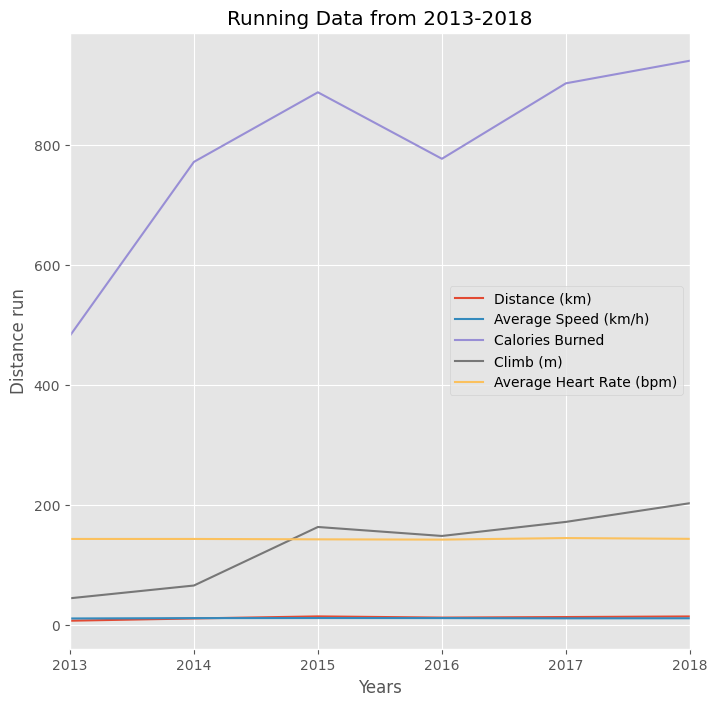

In [135]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)
# Prepare data subsetting period from 2013 till 2018
run= run_2013_2018.resample('A').mean()
run.plot(kind='line',
                           sharex=False,
                           figsize=(8,8)
                          )
plt.title('Running Data from 2013-2018')
plt.xlabel('Years')
plt.ylabel('Distance run')
# Show plot
# ... YOUR CODE FOR TASK 4 ...

## 5. Running statistics
<p>No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. </p>
<p>You'll know you're with a group of runners if you commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>
<p>Let's find the answers to these questions in my data. If you look back at plots in Task 4, you can see the answer to, <em>Do you measure your heart rate?</em> Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.</p>
<p>In pandas, the <code>resample()</code> method is similar to the <code>groupby()</code> method - with <code>resample()</code> you group by a specific time span. We'll use <code>resample()</code> to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.</p>

In [117]:
# Prepare running data for the last 4 years
URL= 'cardioActivities- run 2015-18.csv'
run_2015_2018= pd.read_csv(URL,parse_dates=["Date"], index_col=["Date"])

# Calculate annual statistics
monthly_resampled_data= run_2015_2018.resample('A').mean()
print('How my average run looks in last 4 years:',monthly_resampled_data)


# Calculate weekly statistics
weekly_resampled_data= run_2015_2018["Distance (km)"].resample('W').mean()
print('Weekly averages of last 4 years:', weekly_resampled_data)

# Mean weekly counts
weekly_counts_average = run_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

<ipython-input-117-b2861c0a501d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_resampled_data= run_2015_2018.resample('A').mean()


How my average run looks in last 4 years:             Distance (km)  Average Speed (km/h)  Calories Burned   Climb (m)  \
Date                                                                           
2014-12-31      11.092286             11.647286       771.671429   65.957143   
2015-12-31      14.522826             11.781413       887.611992  163.467391   
2016-12-31      12.526582             11.697342       776.860759  148.518987   
2017-12-31      13.458977             11.308636       902.579545  171.954545   
2018-12-31      14.434648             11.365211       940.211268  203.112676   

            Average Heart Rate (bpm)  
Date                                  
2014-12-31                143.530000  
2015-12-31                142.892717  
2016-12-31                142.446835  
2017-12-31                145.018068  
2018-12-31                143.719155  
Weekly averages of last 4 years: Date
2014-01-12    11.11
2014-01-19      NaN
2014-01-26      NaN
2014-02-02     3.38
2014-0

## 6. Visualization with averages
<p>Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>
<p>In this task, we will use <code>matplotlib</code> functionality for plot creation and customization.</p>

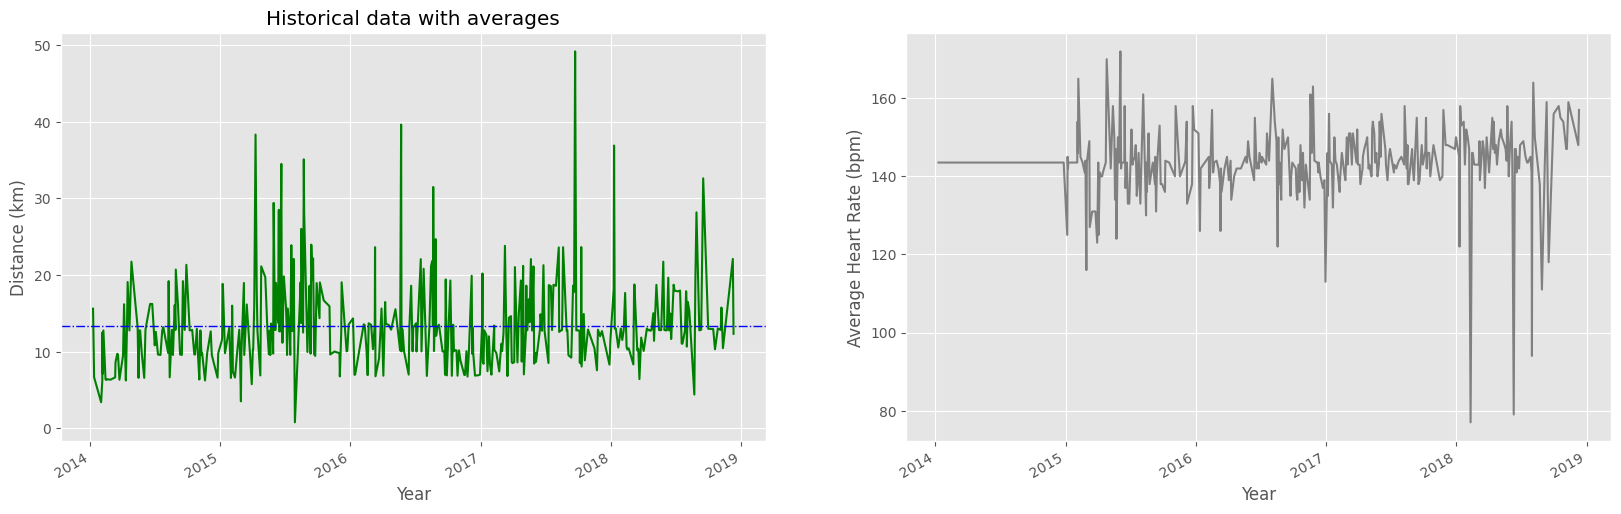

In [151]:
# Prepare data

runs_distance = run_2015_2018['Distance (km)']
runs_hr = run_2015_2018['Average Heart Rate (bpm)']

# Create plot
fig= plt.figure()
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

# Plot and customize first subplot
# ... YOUR CODE FOR TASK 6 ...
runs_distance.plot(kind='line', color='green', figsize=(20,6), ax=ax1)
ax1.set(xlabel='Year',ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Year', ylabel='Average Heart Rate (bpm)')
# ... YOUR CODE FOR TASK 6 ...

# Show plot
plt.show()

## 7. Did I reach my goals?
<p>To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.</p>

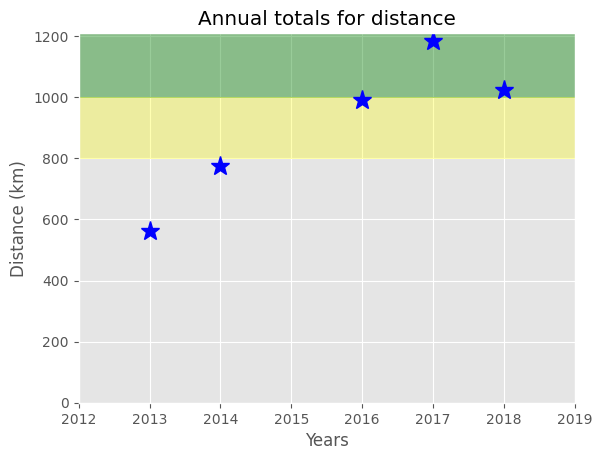

In [127]:
# Prepare data
df_run_dist_annual =run_2013_2018['Distance (km)'].resample('Y').sum()

# Create plot
fig = plt.figure()

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
# ... YOUR CODE FOR TASK 7 ...

# Show plot
# ... YOUR CODE FOR TASK 7 ...

## 8. Am I progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

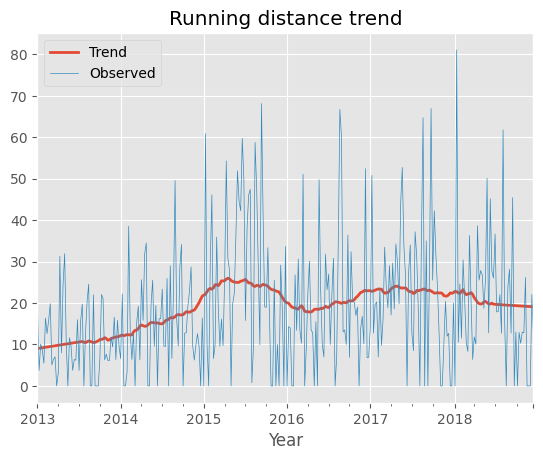

In [152]:
# Import required library
# ... YOUR CODE FOR TASK 8 ...
import statsmodels.api as sm
# Prepare data
df_run_dist_wkly = run_2013_2018['Distance (km)'].resample('W').sum()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1)

# Create plot
fig = plt.figure()

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')
ax.set_xlabel('Year')

# Show plot
plt.show()

## 9. Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

Text(0.5, 0, "['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']")

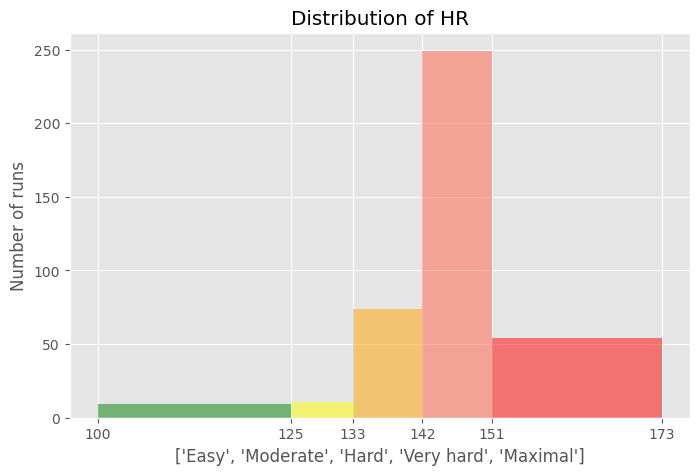

In [153]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = run_2015_2018['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(8,5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xlabel(zone_names)
# ... YOUR CODE FOR TASK 9 ...

# Show plot
# ... YOUR CODE FOR TASK 8 ...

## 10. Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [130]:
# Concatenating three DataFrames
df_walk_cycle= df_walk.append(df_cycle)
df_run_walk_cycle =df_walk_cycle.append(df_run)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle[['Distance (km)','Climb (m)']].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:'), df_summary.stack()
# ... YOUR CODE FOR TASK 10 ...

<ipython-input-130-0ff513ff91cc>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_walk_cycle= df_walk.append(df_cycle)
<ipython-input-130-0ff513ff91cc>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_run_walk_cycle =df_walk_cycle.append(df_run)


Totals for different training types:


Distance (km)     6687.01
Climb (m)        72349.00
dtype: float64

Summary statistics for different training types:


(None,
                Average Speed (km/h)     Climb (m)  Distance (km)
 Type                                                            
 Cycling 25%               16.980000    139.000000      15.530000
         50%               19.500000    199.000000      20.300000
         75%               21.490000    318.000000      29.400000
         count             58.000000     58.000000      58.000000
         max               24.330000    553.000000      49.180000
         mean              19.125172    240.551724      23.468276
         min               11.380000     58.000000      11.410000
         std                3.228402    127.824053       9.367769
         total                   NaN  72349.000000    6687.010000
 Other   25%               15.535000    206.250000      17.012500
         50%               16.100000    210.500000      17.225000
         75%               16.665000    214.750000      17.437500
         count              2.000000      2.000000       2.000000
   

## 11. Fun facts
<p>To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.</p>
<p>These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [157]:
# Count average shoes per lifetime (as km per pair) using our fun facts
average_shoes_lifetime = 5224/7
print ('The average number of shoes need in a lifetime:', round(average_shoes_lifetime))

# Count number of shoes for Forrest's run distance
shoes_for_forrest_run = round((24700/average_shoes_lifetime))

print('Forrest Gump would need {} pairs of shoes!', format(shoes_for_forrest_run))

The average number of shoes need in a lifetime: 746
Forrest Gump would need {} pairs of shoes! 33
